<a href="https://colab.research.google.com/github/IsmailAKBOGA/NASA-Nearest-Earth-Objects-1910-2024-globalai_ML_project-/blob/main/Nearest_Earth_Objects(1_%5BGlobalA%C4%B0_unsupervised%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gerekli Kütüphaneleri Yükledik.

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# Dosyayı okuduk ve ilk 5 satırını yazdırdık.

In [2]:
df = pd.read_csv("/content/nearest-earth-objects(1910-2024).csv")
print(df.head())


    neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

  is_hazardous  
0        False  
1         True  
2        False  


Sayısal sütunları seçtik ve seçilen sütunları içeren dataframe oluşturduk.

In [3]:
numerical_columns = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
                     'relative_velocity', 'miss_distance']
x = df[numerical_columns]


# Özellikleri standartlaştırdık.

In [4]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


# Eksik verileri ortalama ile doldurduk.

In [5]:
imputer = SimpleImputer(strategy='mean')
x_scaled_imputed = imputer.fit_transform(x_scaled)

# KMeans algoritmasını 3 küme için başlattık ve sonuçları "cluster" sütununa ekledik.

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(x_scaled_imputed)

# Kümeleri görselleştirdik.

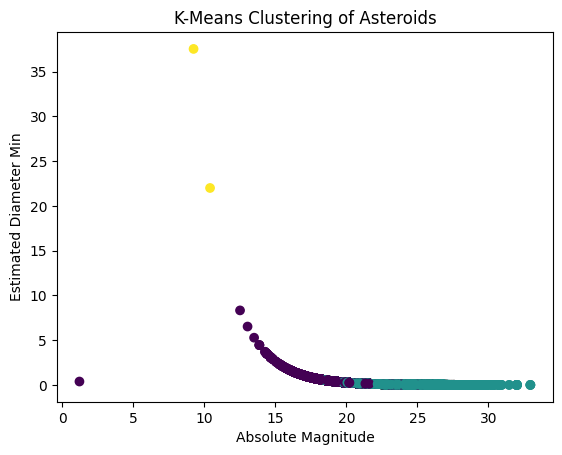

In [7]:
plt.scatter(df['absolute_magnitude'], df['estimated_diameter_min'], c=df['cluster'], cmap='viridis')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Estimated Diameter Min')
plt.title('K-Means Clustering of Asteroids')
plt.show()